# Demo : Even/ODD classify

Author: Jim Xie

Date:   2020-08-07

In [21]:
# -*- coding: utf-8 -*- 
import sys,os,random,math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from numpy.random import RandomState
np.set_printoptions(suppress=True)
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier, BaggingClassifier  
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from xgboost import XGBClassifier
sns.set(font_scale=2)
from warnings import filterwarnings
filterwarnings('ignore')
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [22]:
g_classifiers = [
    # 逻辑回归
    ('Logistic Regression', LogisticRegression()), 
    # K最近邻
    ('Nearest Neighbors', KNeighborsClassifier(3)),  
    # 线性的支持向量机
    ('Linear SVM', SVC(kernel='linear', C=0.025)),
    # 径向基函数的支持向量机
    ('RBF SVM', SVC(gamma=2, C=1)),
    # 基于拉普拉斯近似的高斯过程
    ('Gaussian Process', GaussianProcessClassifier(1.0 * RBF(1.0))),  
    # 决策树
    ('Decision Tree', DecisionTreeClassifier(max_depth=5)),  
    # 随机森林
    ('Random Forest', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)),  
    # 通过迭代弱分类器而产生最终的强分类器的算法
    ('AdaBoost', AdaBoostClassifier()),  
    ('Extra Trees', ExtraTreesClassifier()),
    # 梯度提升树
    ('GradientBoosting', GradientBoostingClassifier()),  
    ('Bagging', BaggingClassifier()),
    # 朴素贝叶斯
    ('Naive Bayes', GaussianNB()),  
    # 二次判别分析
    ('QDA', QuadraticDiscriminantAnalysis()),  
    # 线性判别分析
    ('LDA', LinearDiscriminantAnalysis()),  
    # 多层感知机
    ('MLP', MLPClassifier(alpha=1)),
    # 极端梯度提升
    ('XGB', XGBClassifier()),
]

In [23]:
def GetParityData():
    dataset_size = 100
    x1 = np.random.random_integers(0,500,dataset_size)
    y = []
    x = []
    for t1 in x1:
        if (t1)%2 == 0:
            y.append([1])
            x.append([t1])
        else:
            x.append([t1])
            y.append([0])
    return np.array(x),np.array(y)

In [24]:
raw_x,raw_y = GetParityData()

# Method from internet

In [25]:
extern_raw_x,extern_raw_y = GetParityData()
verify_x,verify_y = GetParityData()
def digital2bin(x):
    a = format(x, '032b')
    l = list(str(a))
    l = np.array(list(map(int, l)))
    return l

train_x = []
train_y = []
for item,label in zip(extern_raw_x,extern_raw_y):
    a = item[0]
    b = digital2bin(a )
    train_x.append(b)
    train_y.append(label)

train_x = np.array(train_x)
train_y = np.array(train_y)

test_x = []
test_y = []
for item,label in zip(verify_x,verify_y):
    a = item[0]
    b = digital2bin(a )
    test_x.append(b)
    test_y.append(label)
test_x = np.array(test_x)
test_y = np.array(test_y)

<AxesSubplot:xlabel='1', ylabel='0'>

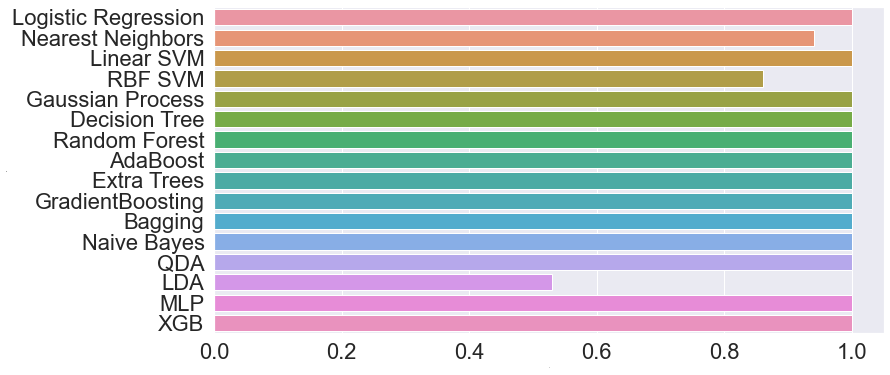

In [27]:
result = []
models = {}
for name, clf in g_classifiers:
    clf.fit(train_x, train_y)
    score = clf.score(test_x, test_y)
    result.append((name,score))
    models[name] = clf
df = pd.DataFrame(result)
plt.xlabel('Classifier',fontsize=2)
plt.ylabel('Accuracy',fontsize=2)
plt.style.use({'figure.figsize':(12, 6)})
sns.barplot(y=0, x=1, data=df)

In [28]:
pred_y = models['XGB'].predict(test_x)
for x,y in zip(test_x,pred_y):
    if y == 1:
        print(" %s --> Even" %x)
    else:
        print(" %s --> Odd" %x)

 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1] --> Odd
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1] --> Odd
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1] --> Odd
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1] --> Odd
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0] --> Even
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0] --> Even
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0] --> Even
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1] --> Odd
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1] --> Odd
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1] --> Odd
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1] --> Odd
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0] --> Even
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1] --> Odd
 [0 0 0 0 0 0 0 0 0 0

# EDA

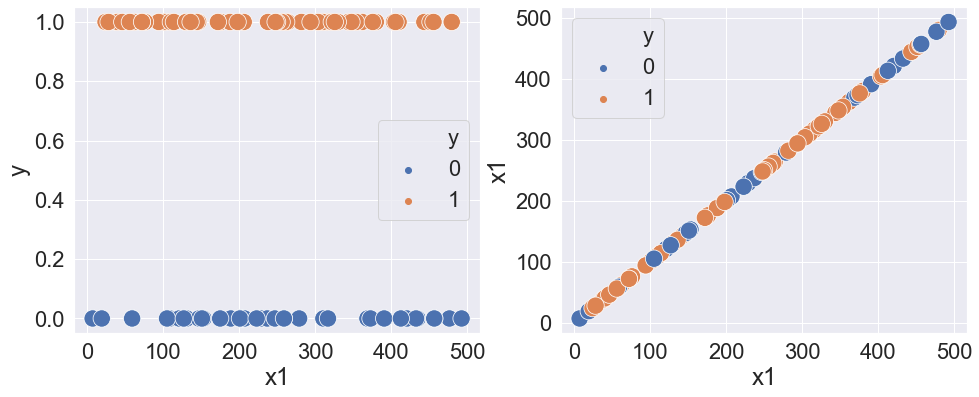

In [29]:
df = pd.DataFrame(raw_x)
df.rename(columns={0:'x1'},inplace=True) #df.columns.values.tolist()
df['y'] = raw_y
fig,axes=plt.subplots(1,2,figsize=(16,6)) 
ax = sns.scatterplot(x='x1', y='y',hue='y', data=df,s=300, ax=axes[0])
ax = sns.scatterplot(x='x1', y='x1',hue='y', data=df,s=300, ax=axes[1])
ax.ticklabel_format(style='plain',axis='both')

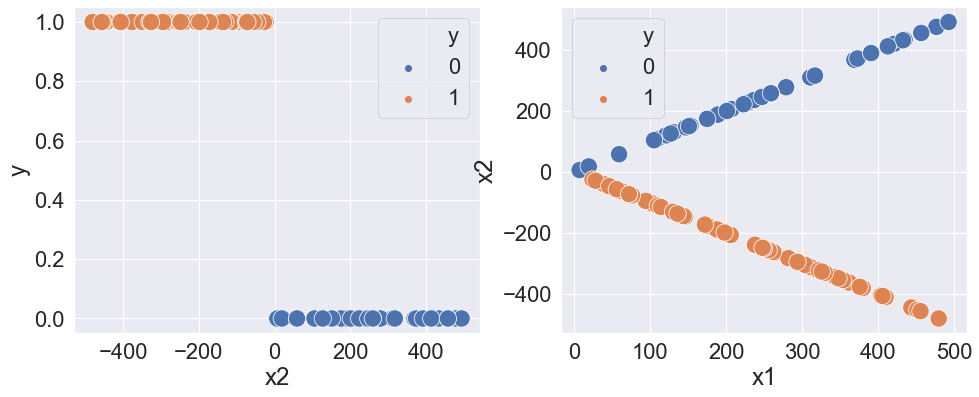

In [30]:
df['x2'] = df['x1']
df.x2[df.y==1] = -df['x1']
fig,axes=plt.subplots(1,2,figsize=(16,6))
ax = sns.scatterplot(x='x2', y='y',hue='y', data=df,s=300, ax=axes[0])
ax = sns.scatterplot(x='x1', y='x2',hue='y', data=df,s=300, ax=axes[1])
ax.ticklabel_format(style='plain',axis='both')

# Data Preprecess

In [31]:
def prepress(data):
    return np.power(-1.005,data)

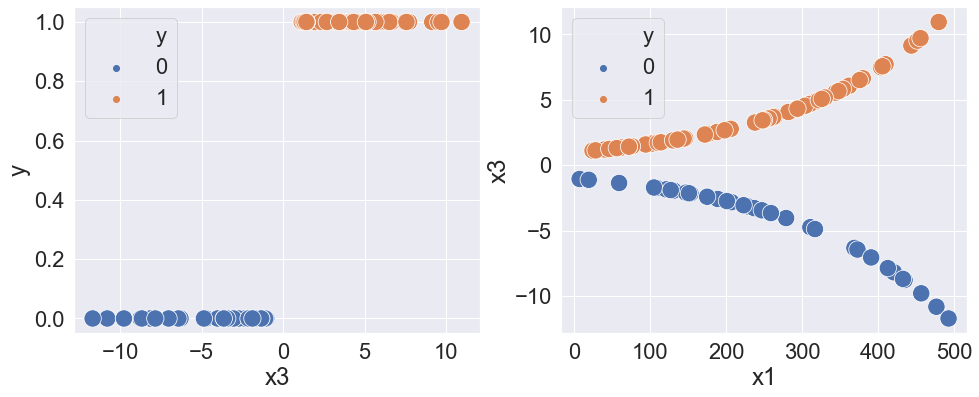

In [32]:
df['x3'] = prepress(df['x1'])
fig,axes=plt.subplots(1,2,figsize=(16,6)) 
ax = sns.scatterplot(x='x3', y='y',hue='y', data=df,s=300, ax=axes[0])
ax = sns.scatterplot(x='x1', y='x3',hue='y', data=df,s=300, ax=axes[1])
ax.ticklabel_format(style='plain',axis='both')

# Train

(100, 1) (100, 1)


<AxesSubplot:xlabel='1', ylabel='0'>

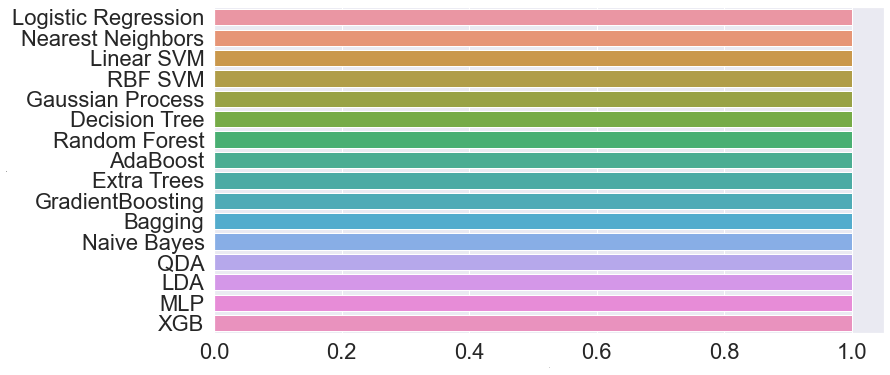

In [33]:
train_x,train_y = GetParityData()
test_x,test_y = GetParityData()
train_x = prepress(train_x)
test_x = prepress(test_x)
print(train_x.shape,train_y.shape)
result = []
models = {}
for name, clf in g_classifiers:
    clf.fit(train_x, train_y)
    score = clf.score(test_x, test_y)
    result.append((name,score))
    models[name] = clf
df = pd.DataFrame(result)
plt.style.use({'figure.figsize':(12, 6)})
plt.xlabel('Classifier',fontsize=2)
plt.ylabel('Accuracy',fontsize=2)
sns.barplot(y=0, x=1, data=df)

# Predict

In [34]:
input_x = np.random.random_integers(500,1000,20)
input_x=input_x[:,np.newaxis]
pred_x = np.array(input_x)
pred_x = prepress(pred_x)
pred_y = models['XGB'].predict(pred_x)
for x,y in zip(input_x,pred_y):
    if y == 1:
        print(" %d --> Even" %x[0])
    else:
        print(" %d --> Odd" %x[0])

 556 --> Even
 680 --> Even
 978 --> Even
 807 --> Odd
 528 --> Even
 665 --> Odd
 592 --> Even
 907 --> Odd
 803 --> Odd
 948 --> Even
 766 --> Even
 809 --> Odd
 803 --> Odd
 686 --> Even
 750 --> Even
 674 --> Even
 553 --> Odd
 858 --> Even
 501 --> Odd
 876 --> Even


In [49]:
raw_x,raw_y = GetParityData()
raw_x = prepress(raw_x)
test_x,test_y = GetParityData()
test_ori_x = test_x
test_x = prepress(test_x)

In [50]:
input_x = tf.placeholder(tf.float32, [None, 1])
input_y = tf.placeholder(tf.float32, [None, 1])

In [51]:
def Create_Input(n_hidden_count):
    dim = input_x.shape[1].value
    w = tf.Variable(tf.random_normal([dim,n_hidden_count],stddev=1,seed=1))
    b = tf.Variable(tf.random_normal([n_hidden_count],stddev=1,seed=1))
    o = tf.matmul(input_x, w)+b
    o = tf.nn.sigmoid(o)
    return o
def Create_Hidden(in_data,n_hidden_count):
    dim = in_data.shape[1].value
    w = tf.Variable( tf.truncated_normal([dim, n_hidden_count]), name = 'w')
    b = tf.Variable(tf.random_normal([n_hidden_count],stddev=1,seed=1))
    o = tf.matmul(in_data, w)+b
    o = tf.nn.sigmoid(o)
    return o
def Create_Output(in_data):
    dim = in_data.shape[1].value
    out_dim = input_y.shape[1].value
    w = tf.Variable( tf.truncated_normal([dim, out_dim]), name = 'w')
    b = tf.Variable(tf.random_normal([out_dim],stddev=1,seed=1))
    o = tf.matmul(in_data, w)+b
    o = tf.nn.sigmoid(o)
    return o

In [52]:
L0 = Create_Input(1)
L1 = Create_Hidden(L0,1)
prediction = Create_Output(L1)

In [53]:
entropy = input_y * tf.log(tf.clip_by_value(prediction,1e-10,1.0))+(1-input_y) * tf.log(tf.clip_by_value(1-prediction,1e-10,1.0))
cross_entropy = -tf.reduce_mean(entropy)
train_step = tf.train.AdamOptimizer(0.01).minimize(cross_entropy)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(10000):
    sess.run(train_step,feed_dict={input_x:raw_x,input_y:raw_y})
    if i % 500 == 0:
        total_cross_entropy = sess.run(cross_entropy,feed_dict={input_x:raw_x,input_y:raw_y})
        print("Step %d, loss is %6f"%(i,total_cross_entropy))
pred_Y = sess.run(prediction,feed_dict={input_x:test_x})

Step 0, loss is 0.865705
Step 500, loss is 0.112937
Step 1000, loss is 0.033306
Step 1500, loss is 0.016058
Step 2000, loss is 0.009353
Step 2500, loss is 0.006006
Step 3000, loss is 0.004088
Step 3500, loss is 0.002889
Step 4000, loss is 0.002095
Step 4500, loss is 0.001548
Step 5000, loss is 0.001159
Step 5500, loss is 0.000876
Step 6000, loss is 0.000667
Step 6500, loss is 0.000511
Step 7000, loss is 0.000393
Step 7500, loss is 0.000303
Step 8000, loss is 0.000234
Step 8500, loss is 0.000182
Step 9000, loss is 0.000141
Step 9500, loss is 0.000110


In [54]:
for x,y,label in zip (test_ori_x,pred_Y,test_y):
    if y > 0.5: 
       print(x[0], "--- Even")
    else:
       print(x[0], "--- Odd")

358 --- Even
16 --- Even
143 --- Odd
305 --- Odd
322 --- Even
72 --- Even
446 --- Even
210 --- Even
96 --- Even
58 --- Even
69 --- Odd
477 --- Odd
87 --- Odd
361 --- Odd
494 --- Even
319 --- Odd
151 --- Odd
21 --- Odd
220 --- Even
160 --- Even
342 --- Even
112 --- Even
220 --- Even
491 --- Odd
174 --- Even
3 --- Odd
387 --- Odd
97 --- Odd
226 --- Even
128 --- Even
198 --- Even
244 --- Even
213 --- Odd
227 --- Odd
265 --- Odd
447 --- Odd
19 --- Odd
314 --- Even
354 --- Even
286 --- Even
475 --- Odd
105 --- Odd
447 --- Odd
334 --- Even
439 --- Odd
369 --- Odd
251 --- Odd
175 --- Odd
11 --- Odd
282 --- Even
311 --- Odd
457 --- Odd
236 --- Even
124 --- Even
92 --- Even
158 --- Even
159 --- Odd
236 --- Even
48 --- Even
269 --- Odd
179 --- Odd
239 --- Odd
156 --- Even
230 --- Even
250 --- Even
310 --- Even
496 --- Even
437 --- Odd
343 --- Odd
427 --- Odd
320 --- Even
226 --- Even
325 --- Odd
473 --- Odd
329 --- Odd
300 --- Even
98 --- Even
16 --- Even
410 --- Even
273 --- Odd
28 --- Even
288

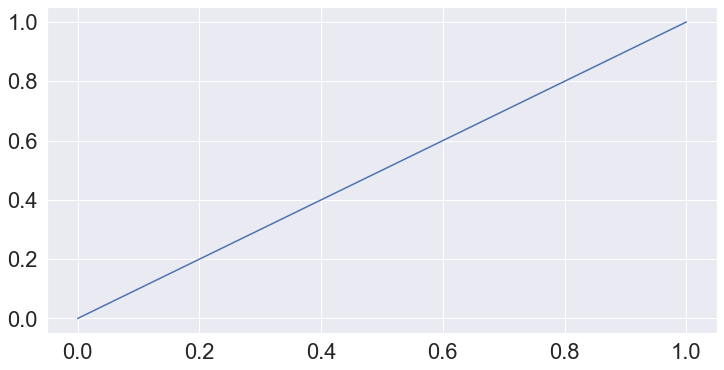

[1.9999375  0.99993753]


In [48]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_Y, pos_label=1,drop_intermediate=False)
plt.plot(fpr,tpr)
plt.show()
print(thresholds)